# Taciak Serie 142 Pegel Sensor Kalibration
- Serienwiderstand 1 kOhm
- Batteriespannung 3.12 V
- T~22°C

## Messwerte

In [7]:
import numpy as np

height = np.asarray([0, 9.8, 19.5, 30.0, 39.7]) # Schwimmer Position in cm
V_ADC = np.asarray([0.668, 0.586, 0.484, 0.368, 0.248]) # ADC Spannung in V
V_BAT = 3.12 # Batteriespannung in V

## Fit der Messwerte

In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, c):
    return a * x/(V_BAT-x) + c

popt, pcov = curve_fit(func, V_ADC, height)
print(popt)

[-211.88648117   58.25184658]


## Daten Plotten

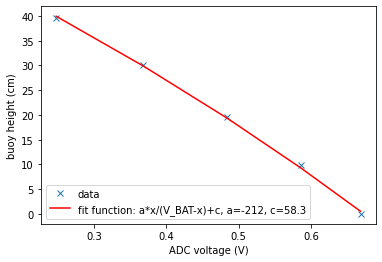

In [12]:
plt.plot(V_ADC, height, 'x', label='data')
plt.plot(V_ADC, func(V_ADC, *popt), 'r-', label='fit function: a*x/(V_BAT-x)+c, a=%.0f, c=%.1f' % tuple(popt))
plt.xlabel('ADC voltage (V)')
plt.ylabel('buoy height (cm)')
plt.legend()

## Umrechnung der ADC Spannung in Pegelstand
h = -212 * V_ADC / (V_BAT - V_ADC) + 58.3 

h: Pegelhöhe des Schwimmers in cm

V_ADC: ADC Spannung in V

V_BAT: Batteriespannung in V